## Observations and Insights

- There seems to be a comparable amount of Male to Female Mice in this study
- There is a strong positive correlation between the weight of a mouse and average Tumor Volume in the Capomulin study
- 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
fulldata=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")
fulldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousegrouped=fulldata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
mousegrouped


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, '# of Data Points')

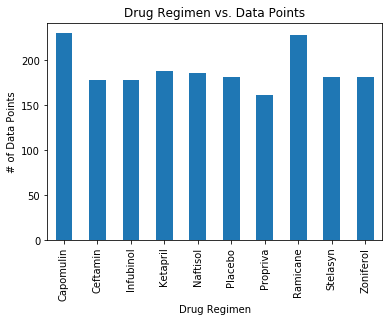

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
barplotdata=fulldata.groupby("Drug Regimen")["Mouse ID"].count().to_frame()
barplotdata.rename(columns={"Mouse ID":"Data Points"}, inplace=True)
ax=barplotdata.plot(kind="bar",legend=False,title="Drug Regimen vs. Data Points")
ax.set_ylabel("# of Data Points")

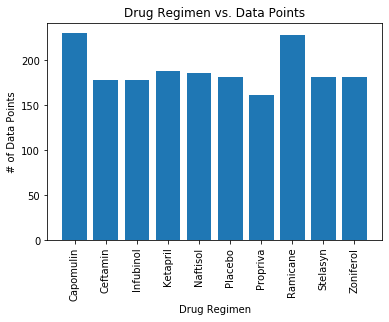

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
pybardata=barplotdata.reset_index(drop=False)
plt.bar(pybardata["Drug Regimen"],pybardata["Data Points"])
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Data Points")
plt.title("Drug Regimen vs. Data Points")
plt.show()

## Pie plots

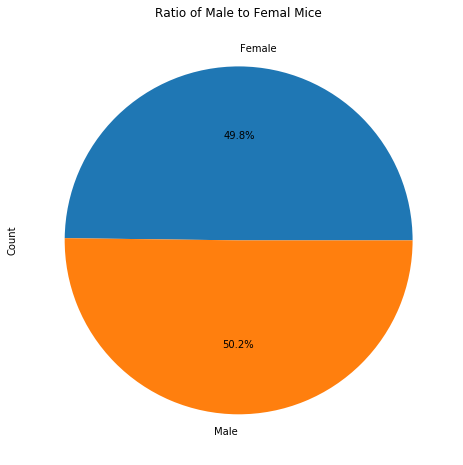

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
piedata=fulldata.drop_duplicates("Mouse ID")
piedata=piedata.groupby("Sex")["Mouse ID"].count().to_frame()
piedata.rename(columns={"Mouse ID":"Count"}, inplace=True)
ax=piedata.plot.pie(y="Count", figsize=(8,8),autopct='%1.1f%%',legend=False,title="Ratio of Male to Femal Mice")

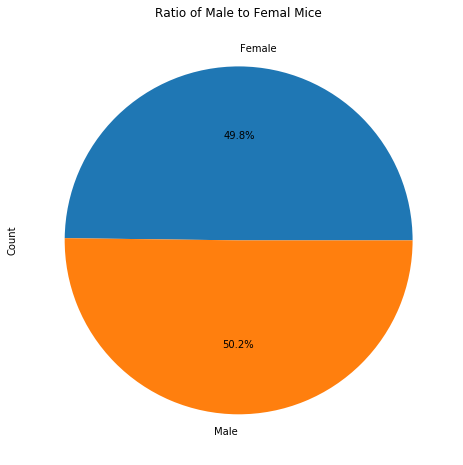

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=piedata.index.values.tolist()
sizes=piedata["Count"]
fig,ax=plt.subplots(figsize=(8,8))
ax.set_ylabel("Count")
ax.pie(piedata["Count"],labels=piedata.index.values.tolist(),autopct='%1.1f%%')
plt.title("Ratio of Male to Femal Mice")
plt.show()

## Quartiles, outliers and boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
fulldata2=fulldata.sort_values("Timepoint", ascending=False)
groupedregimen=fulldata2.groupby(["Drug Regimen","Mouse ID"])
groupedregimen=groupedregimen.first()
# print(groupedregimen.head())

#CAPOMULIN DATA
q75,q25=np.percentile(groupedregimen.loc["Capomulin","Tumor Volume (mm3)"],[75,25])
capo_iqr=q75-q25
upperbound=q75+(1.5*capo_iqr)
lowerbound=q25-(1.5*capo_iqr)
outliers=[True for i in groupedregimen.loc["Capomulin","Tumor Volume (mm3)"] if i>upperbound or i<lowerbound]
print(f"There are {'some' if any(outliers) else 'no'} outliers in the Capomulin Data")

#Ramicane DATA
q75,q25=np.percentile(groupedregimen.loc["Ramicane","Tumor Volume (mm3)"],[75,25])
ram_iqr=q75-q25
upperbound=q75+(1.5*ram_iqr)
lowerbound=q25-(1.5*ram_iqr)
outliers=[True for i in groupedregimen.loc["Ramicane","Tumor Volume (mm3)"] if i>upperbound or i<lowerbound]
print(f"There are {'some' if any(outliers) else 'no'} outliers in the Ramicane Data")

#Infubinol DATA
q75,q25=np.percentile(groupedregimen.loc["Infubinol","Tumor Volume (mm3)"],[75,25])
inf_iqr=q75-q25
upperbound=q75+(1.5*inf_iqr)
lowerbound=q25-(1.5*inf_iqr)
outliers=[True for i in groupedregimen.loc["Infubinol","Tumor Volume (mm3)"] if i>upperbound or i<lowerbound]
print(f"There are {'some' if any(outliers) else 'no'} outliers in the Infubinol Data")

#Ceftamin DATA
q75,q25=np.percentile(groupedregimen.loc["Ceftamin","Tumor Volume (mm3)"],[75,25])
ceft_iqr=q75-q25
upperbound=q75+(1.5*ceft_iqr)
lowerbound=q25-(1.5*ceft_iqr)
outliers=[True for i in groupedregimen.loc["Ceftamin","Tumor Volume (mm3)"] if i>upperbound or i<lowerbound]
print(f"There are {'some' if any(outliers) else 'no'} outliers in the Ceftamin Data")

There are no outliers in the Capomulin Data
There are no outliers in the Ramicane Data
There are some outliers in the Infubinol Data
There are no outliers in the Ceftamin Data


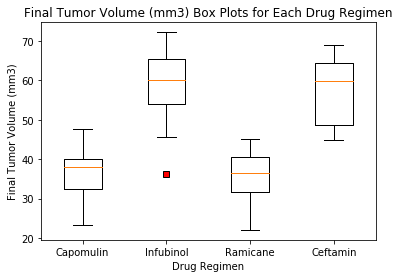

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxes={"Capomulin":groupedregimen.loc["Capomulin","Tumor Volume (mm3)"],"Infubinol":groupedregimen.loc["Infubinol","Tumor Volume (mm3)"],"Ramicane":groupedregimen.loc["Ramicane","Tumor Volume (mm3)"],"Ceftamin":groupedregimen.loc["Ceftamin","Tumor Volume (mm3)"],}
fig, ax = plt.subplots()
ax.boxplot(boxes.values(),showfliers=True,flierprops={"markerfacecolor":'r', "marker":'s'})
ax.set_xticklabels(boxes.keys())
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume (mm3) Box Plots for Each Drug Regimen")
plt.show()

## Line and scatter plots

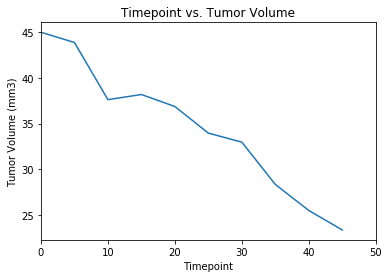

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=fulldata.loc[(fulldata["Drug Regimen"]=="Capomulin") & (fulldata["Mouse ID"]=="s185"),["Timepoint","Tumor Volume (mm3)"]]
capomulin.head()
plt.plot(capomulin["Timepoint"],capomulin["Tumor Volume (mm3)"])
plt.xlim(0,50)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs. Tumor Volume")
plt.show()

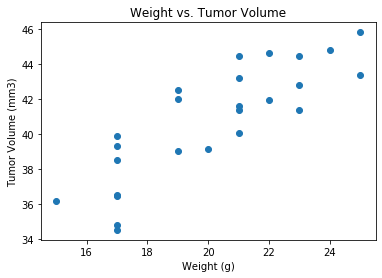

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin=fulldata.loc[fulldata["Drug Regimen"]=="Capomulin",["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
capomulingrouped=capomulin.groupby("Mouse ID").mean()
plt.scatter(capomulingrouped["Weight (g)"],capomulingrouped["Tumor Volume (mm3)"],marker='o')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs. Tumor Volume")
plt.show()

The Correlation Coefficient is 0.8419363424694718


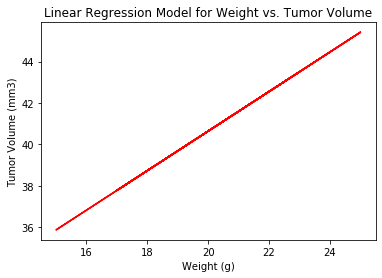

In [42]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(capomulingrouped["Weight (g)"], capomulingrouped["Tumor Volume (mm3)"])
print(f"The Correlation Coefficient is {r_value}")
plt.plot(capomulingrouped["Weight (g)"], intercept + slope*capomulingrouped["Weight (g)"], 'r', label='fitted line')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression Model for Weight vs. Tumor Volume")
plt.show()